### Load gene data

In [1]:
gene_name="cgreGFP" # amacGFP cgreGFP ppluGFP 
# did not run genetic algo to predict avGFP variants

# targeted number of mutations
nb_mutation_target=96

# None: keep all runs
# True: keep only runs where we tried to enrich in non-extant mutations
# False: exclude runs where non-extant mutations were enriched
non_extant_enrich = None


In [2]:
print(nb_mutation_target)

96


Import modules
Define functions
Load cgreGFP data
cgreGFP 236 aa


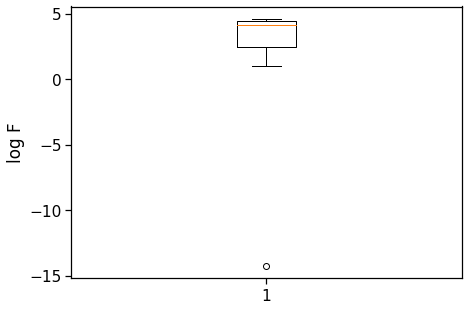

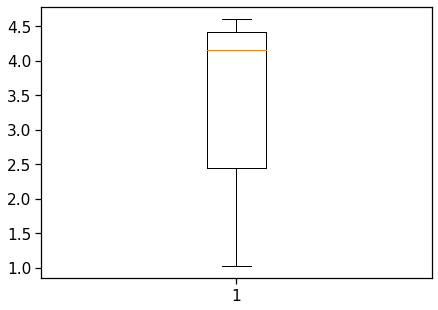

Pre-processing cgreGFP
Split train, valid, test sets


In [3]:
showmatrix=False
load_encodings=False
%run 01_preprocessing.ipynb

### Load genetic algo data

In [4]:

# List run result files

runs_files = [f for f in listdir(geneticAlgo_output_folder) \
              if isfile(join(geneticAlgo_output_folder, f)) \
              and gene_name in f and "last_generation" in f ]

if non_extant_enrich==None: pass 
elif non_extant_enrich==True:  runs_files = [f for f in runs_files if "extant" in f]
elif non_extant_enrich==False: runs_files = [f for f in runs_files if not "extant" in f]
else: raise


# listing all run files
# loading only the ones matching the targetted number of mutations
last_generations=[]
for nb_muts in list(range(6,96+6,6)):
    
    sub = sorted([f for f in runs_files if f"target{nb_muts}muts" in f])
    print(f"{nb_muts} muts: {len(sub)} files")

    for run_file in sub:
        print(run_file)
        
        if f"target{nb_mutation_target}muts" in run_file:
            run_data = pd.read_csv(geneticAlgo_output_folder+run_file)
            run_data["run"]=run_file
            last_generations.append(run_data)

last_generations=pd.concat(last_generations,axis=0)

# reindex
last_generations = pd.DataFrame.reset_index(last_generations,drop=True)


6 muts: 15 files
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 18-44-04.950830_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 18-47-05.835809_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 18-48-40.102555_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 18-56-45.026599_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 18-58-39.224590_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-00-53.979951_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-03-00.179139_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-05-58.167717_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-07-29.781397_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-09-17.796132_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-13-24.140732_last_generation.csv
GeneticAlgo_run_cgreGFP_target6muts_2020-08-25 19-15-48.133093_last_ge

GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-09-30.003848_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-13-47.439911_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-19-10.187224_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-32-30.490351_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-53-42.916908_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 21-59-55.044985_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 22-04-40.573741_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 22-09-29.103683_last_generation_non_extant_only.csv
GeneticAlgo_run_cgreGFP_target96muts_2021-01-14 22-14-36.554591_last_generation_non_extant_only.csv


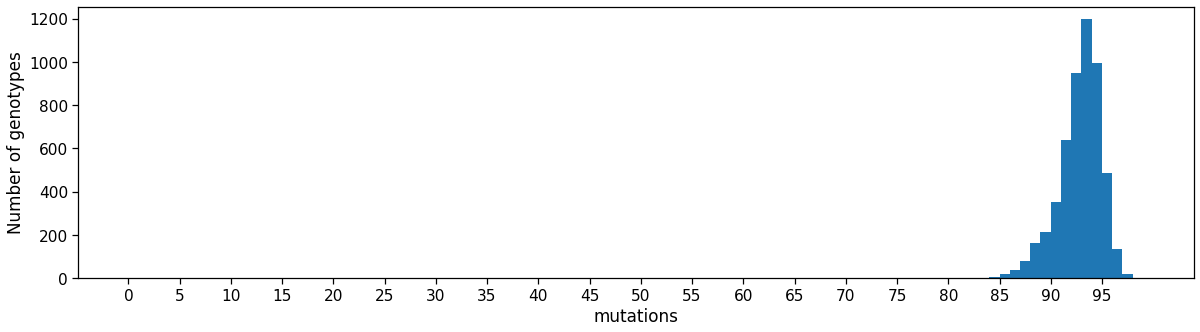

In [5]:
# Distribution of the number of mutations in resulting genotypes
fig, ax = plt.subplots(figsize=(20, 5))
fig.patch.set_facecolor('w')
plt.hist([len(elt.split(":")) for elt in last_generations[genotype_col].values],bins=range(100))
plt.xticks(range(0,100,5))
plt.xlabel("mutations")
plt.ylabel("Number of genotypes")
plt.show()

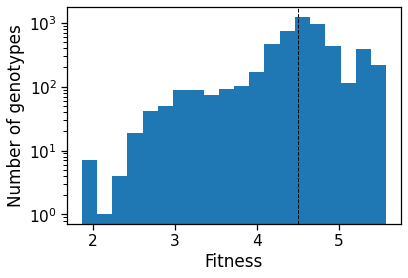

In [6]:
# Distribution of predicted fluorescence in resulting genotypes

h=plt.hist(last_generations["Fitness"],bins=20)
plt.xlabel("Fitness")
plt.ylabel("Number of genotypes")

# add wt indicator
plt.axvline(float(wt_record[brightness_col]), color='k', linestyle='dashed', linewidth=1)
plt.yscale("log")

plt.show()

In [7]:

# Count mutations in last generations genotypes
last_generations_muts = sorted(list(flatten([ row[genotype_col].split(":") for ID,row in last_generations.iterrows()])))
counts_in_last_generations=Counter(last_generations_muts)

### Frequency of mutation in predictions

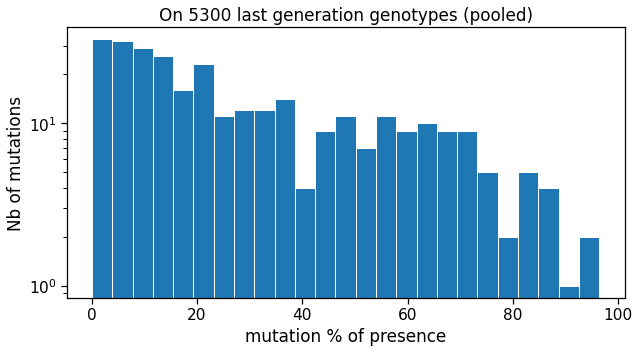

In [8]:

# represent percentage of presence of last generation genotypes
presence_percentage = {}
for mut in counts_in_last_generations.keys():
    p=100*counts_in_last_generations[mut]/last_generations.shape[0]
    presence_percentage[mut]=p
    
fig, ax = plt.subplots(figsize=(10, 5))

fig.patch.set_facecolor('w')
plt.hist(presence_percentage.values(),bins=25,edgecolor="w")
plt.xlabel("mutation % of presence")
plt.ylabel("Nb of mutations")
plt.yscale("log")
ax.set_title(f"On {last_generations.shape[0]} last generation genotypes (pooled)")
plt.show()

### Save recap file

In [9]:
last_generations.shape

(5300, 16)

In [10]:
# remove wild-types
last_generations = last_generations[~last_generations[genotype_col].str.contains("wt", na=False)]

In [11]:
try:mkdir(join(geneticAlgo_output_folder,"RECAP"))
except:pass
recap_file = join(geneticAlgo_output_folder,"RECAP",f"Recap_{gene_name}_target{nb_mutation_target}muts.csv")
last_generations.to_csv(recap_file)